In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Ejercicio 2

En una hoja de Excel, genere en una columna los valores de -8 a 8, con diferencias de 0.1. En otra columna, genere los valores de la pdf de una normal estándar. (pdf=probability density function), es decir:

$$
f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}
$$

En otra columna, genere los valores de la pdf de una normal con media -1.5 y varianza 4, es decir:

$$
g(x) = \frac{1}{\sqrt{8\pi}} e^{-\frac{(x + 1.5)^2}{8}}
$$

Y, por último, genere los valores de la pdf de X donde X es una “mixture” de dos normales con pesos 0.75 para la normal estándar y 0.25 para la segunda (la N(-1.5,4)). La pdf de X va a ser:

$$
h(x) = \frac{3}{4} \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} + \frac{1}{4} \cdot \frac{1}{\sqrt{8\pi}} e^{-\frac{(x + 1.5)^2}{8}}
$$

Esta última variable aleatoria es una mezcla de dos variables aleatorias normales. En la literatura se las llama “normal mixtures”. Realice un gráfico de la pdf de esta última e indique, en función al gráfico, si es simétrica o asimétrica (positiva o negativa). ¿Cómo puede calcular el coeficiente de asimetría y de curtosis de la mixtura?

In [2]:
valores = np.arange(-8, 8.1, 0.1)
df = pd.DataFrame({'values': valores})

df.head()

,values
0,-8.0
1,-7.9
2,-7.8
3,-7.7
4,-7.6


In [3]:
df['pdf_normal_estandar'] = stats.norm.pdf(df['values'], loc=0, scale=1)

df['pdf_normal'] = stats.norm.pdf(df['values'], loc=-1.5, scale=2)

df['pdf_mixture'] = 0.75 * df['pdf_normal_estandar'] + 0.25 * df['pdf_normal']

df.head()

,values,pdf_normal_estandar,pdf_normal,pdf_mixture
0,-8.0,5.052271e-15,0.001015,0.000254
1,-7.9,1.118796e-14,0.001192,0.000298
2,-7.8,2.452855e-14,0.001397,0.000349
3,-7.7,5.324148e-14,0.001633,0.000408
4,-7.6,1.144156e-13,0.001905,0.000476


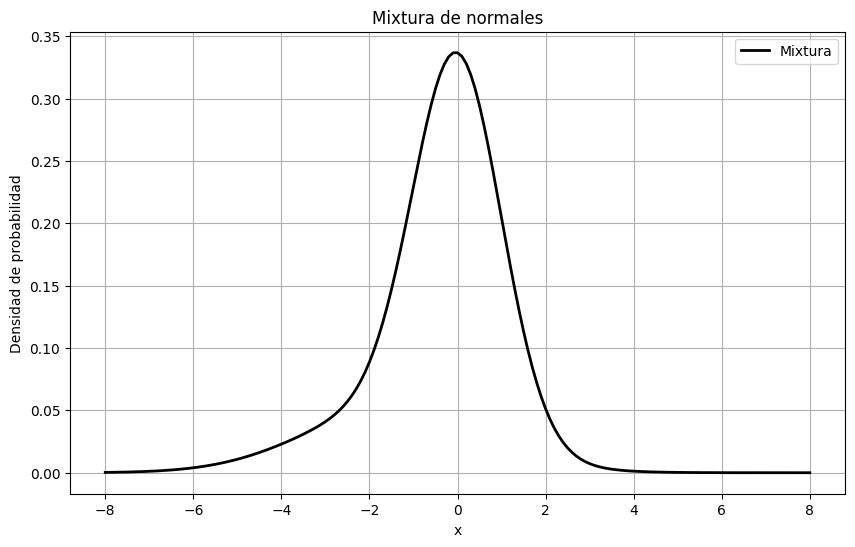

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['values'], df['pdf_mixture'], label="Mixtura", color="black", linewidth=2)
plt.title("Mixtura de normales")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# Se puede ver que la mezcla no es simetrica, y esta desplazada hacia la izquierda

# Ejercicio 3
Para un activo financiero, obtenga una serie de tiempo diaria de precios de cierre de ese activo (3 a 5 años, del período que ustedes deseen).
1. Calcule los retornos diarios simples.
2. Calcule la media, volatilidad, asimetría y curtosis de los retornos.
3. Muestre un histograma de los retornos simples.
4. ¿Los retornos de la muestra siguen una distribución normal? Justifique usando Jarque Bera.
5. Calcule los retornos logarítmicos diarios y para un mes cualquiera, verifique que la suma de los retornos logarítmicos diarios es igual al retorno logarítmico
correspondiente a ese mes.

In [5]:
df = pd.read_excel('SP500_.xlsx', sheet_name=0)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df.head()

,Date,Close
0,2020-06-19,3097.739990
1,2020-06-22,3117.860107
2,2020-06-23,3131.290039
3,2020-06-24,3050.330078
4,2020-06-25,3083.760010


Retorno simple: $R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$

Retorno simple log: $r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$

In [6]:
df['Rt'] = df['Close'].pct_change()
df['rt'] = np.log(df['Close'] / df['Close'].shift(1))

df.head()

,Date,Close,Rt,rt
0,2020-06-19,3097.739990,NaN,NaN
1,2020-06-22,3117.860107,0.006495,0.006474
2,2020-06-23,3131.290039,0.004307,0.004298
3,2020-06-24,3050.330078,-0.025855,-0.026195
4,2020-06-25,3083.760010,0.010959,0.010900


In [7]:
Rt_media = df['Rt'].mean()
print(f"Media de retornos: {Rt_media:.4f}")

Rt_volatilidad = df['Rt'].std()
print(f"Volatilidad de retornos: {Rt_volatilidad:.4f}")

Rt_skewness = df['Rt'].skew()
print(f"Asimetría de retornos: {Rt_skewness:.4f}")

Rt_curtosis = stats.kurtosis(df['Rt'].dropna(), fisher=False)
print(f"Curtosis de retornos: {Rt_curtosis:.4f}")


rt_media = df['Rt'].mean()
print(f"Media de retornos: {rt_media:.4f}")

rt_volatilidad = df['Rt'].std()
print(f"Volatilidad de retornos: {rt_volatilidad:.4f}")

rt_skewness = df['Rt'].skew()
print(f"Asimetría de retornos: {rt_skewness:.4f}")

rt_curtosis = stats.kurtosis(df['rt'].dropna(), fisher=False)
print(f"Curtosis de retornos: {rt_curtosis:.4f}")

Media de retornos: 0.0006
Volatilidad de retornos: 0.0110
Asimetría de retornos: 0.0612
Curtosis de retornos: 9.1273
Media de retornos: 0.0006
Volatilidad de retornos: 0.0110
Asimetría de retornos: 0.0612
Curtosis de retornos: 8.5809


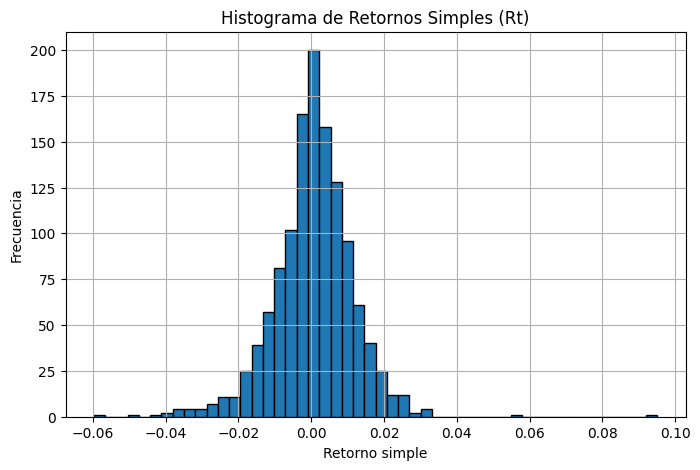

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['Rt'].dropna(), bins=50, edgecolor='black')
plt.title('Histograma de Retornos Simples (Rt)')
plt.xlabel('Retorno simple')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

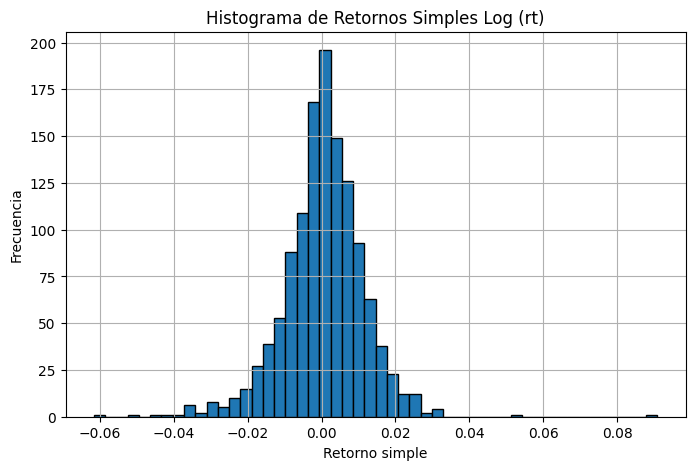

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['rt'].dropna(), bins=50, edgecolor='black')
plt.title('Histograma de Retornos Simples Log (rt)')
plt.xlabel('Retorno simple')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

El test de Jarque-Bera es

$ JB = \frac{n}{6} \left( \text{Skewness}^2 + \frac{\text{Ke}^2}{4} \right) $

Donde Ke es la curtosis en exceso:

$ Ke = \frac{1}{n} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{s} \right)^4 - 3 $

In [10]:
Rt_curtosis = stats.kurtosis(df['Rt'].dropna())
print(f"Curtosis de retornos en exceso: {Rt_curtosis:.4f}")

jb_stat, jb_pvalue = stats.jarque_bera(df['Rt'].dropna())
print(f"Estadístico de Jarque-Bera: {jb_stat:.4f}, p-valor: {jb_pvalue:.4f}")

Curtosis de retornos en exceso: 6.1273
Estadístico de Jarque-Bera: 1964.0195, p-valor: 0.0000


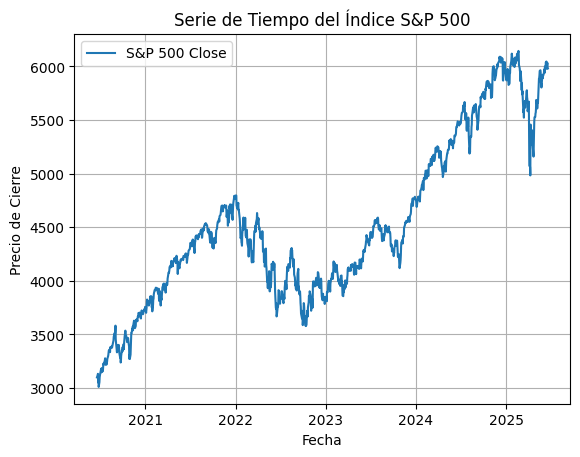

In [11]:
#Extras
plt.figure()
plt.plot(df['Date'], df['Close'], label='S&P 500 Close')
plt.title('Serie de Tiempo del Índice S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.show()

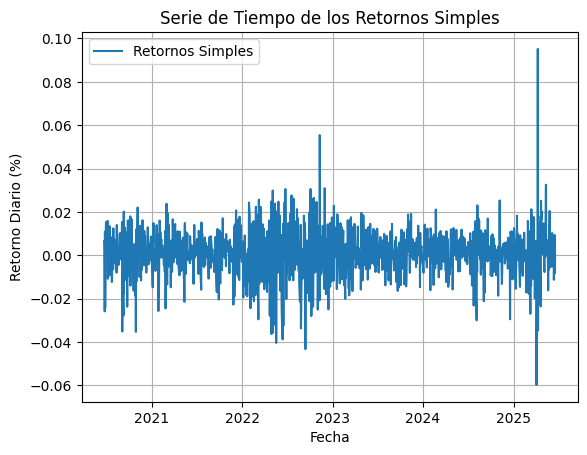

In [13]:
plt.figure()
plt.plot(df['Date'], df['Rt'], label='Retornos Simples')
plt.title('Serie de Tiempo de los Retornos Simples')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario (%)')
plt.grid(True)
plt.legend()
plt.show()

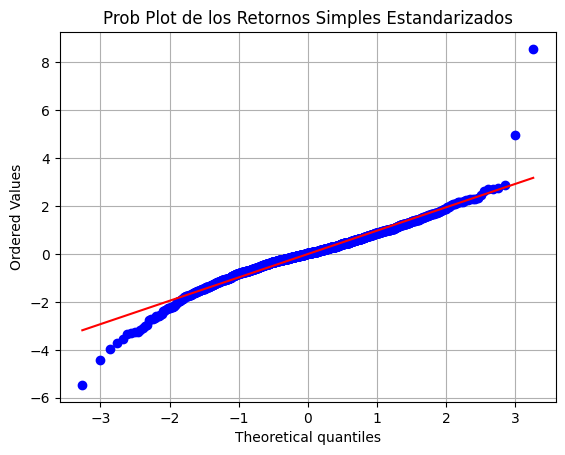

In [14]:
retornos = df['Rt'].dropna()
retornos_estandarizados = (retornos - retornos.mean()) / retornos.std()

plt.figure()
stats.probplot(retornos_estandarizados, dist="norm", plot=plt)
plt.title('Prob Plot de los Retornos Simples Estandarizados')
plt.grid(True)
plt.show()